## 당뇨병 여부 판단

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
X_train, X_test, y_train, y_test = data_load(df, target='Outcome')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import optuna

## EDA

In [3]:
X_train.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30


In [4]:
y_train.head()

,id,Outcome
147,147,0
344,344,0
390,390,0
150,150,0
132,132,1


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 147 to 116
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


In [6]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 147 to 116
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       614 non-null    int64
 1   Outcome  614 non-null    int64
dtypes: int64(2)
memory usage: 14.4 KB


In [7]:
X_train.isnull().sum()

id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [8]:
y_test.isnull().sum()

id         0
Outcome    0
dtype: int64

In [9]:
X_test.isnull().sum()

id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [10]:
X_train.describe()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,386.978827,3.845277,120.705212,68.530945,20.982085,82.229642,31.948534,0.477471,33.319218
std,219.881344,3.388952,32.047977,19.761915,15.965031,116.525772,7.734385,0.339811,11.940953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,196.500000,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244250,24.000000
50%,388.000000,3.000000,117.000000,72.000000,23.000000,44.000000,32.250000,0.377000,29.000000
75%,575.750000,6.000000,140.000000,80.000000,33.000000,130.000000,36.600000,0.628500,41.000000
max,766.000000,17.000000,199.000000,114.000000,99.000000,846.000000,59.400000,2.420000,81.000000


In [11]:
X_train.value_counts()

id   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age
0    6            148      72             35             0        33.6  0.627                     50     1
514  3            99       54             19             86       25.6  0.154                     24     1
504  3            96       78             39             0        37.3  0.238                     40     1
506  0            180      90             26             90       36.5  0.314                     35     1
507  1            130      60             23             170      28.6  0.692                     21     1
                                                                                                        ..
265  5            96       74             18             67       33.6  0.997                     43     1
266  0            138      0              0              0        36.3  0.933                     25     1
267  2            128      64             

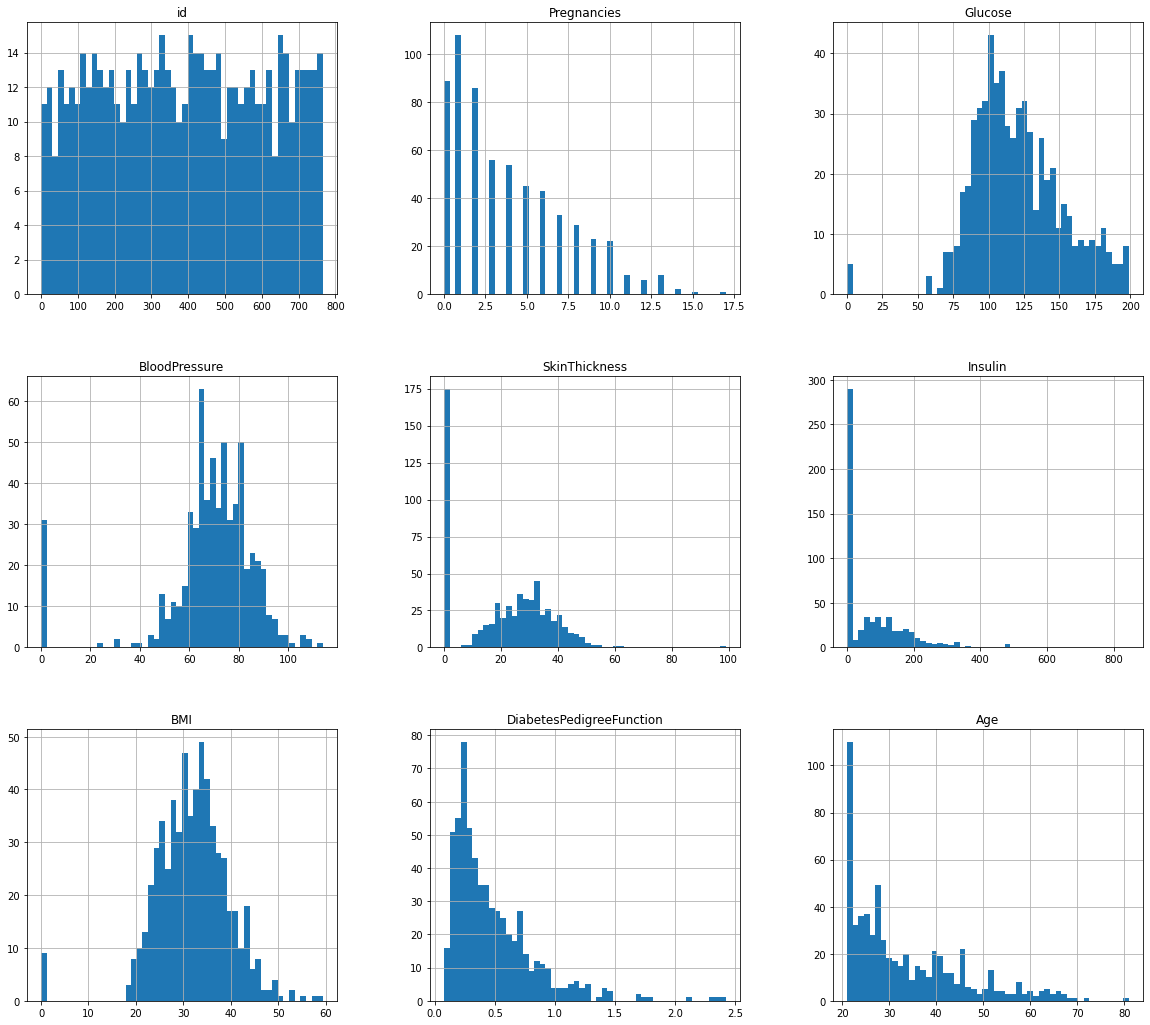

In [12]:
X_train.hist(bins=50, figsize=(20,18));
# Glucose, BloodPressure, SkinThickness, Insulin, BMI의 값 중 0은 이상값

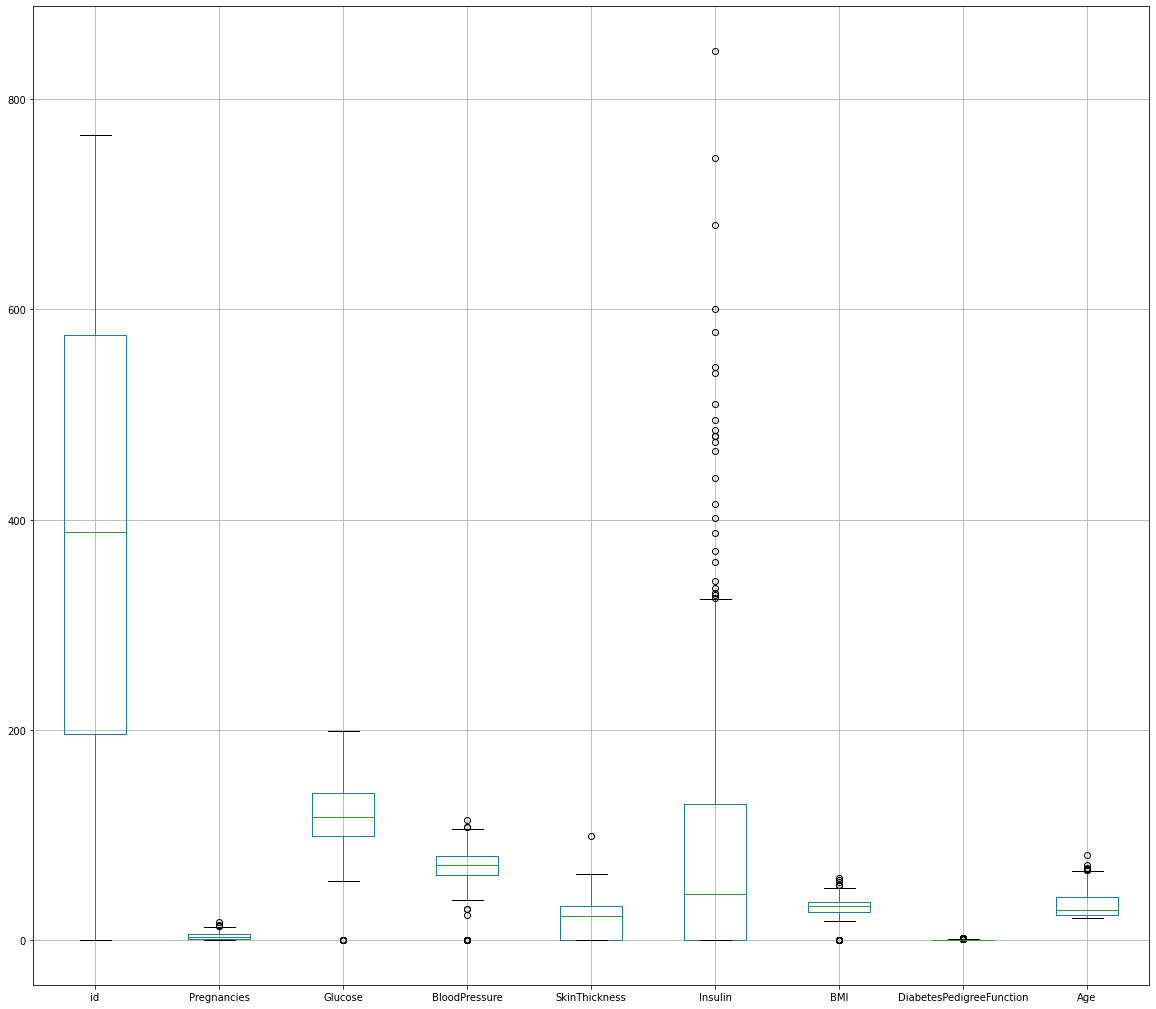

In [13]:
X_train.boxplot(figsize=(20,18));
# Insulin, SkinThickness 이상값 확인 필요

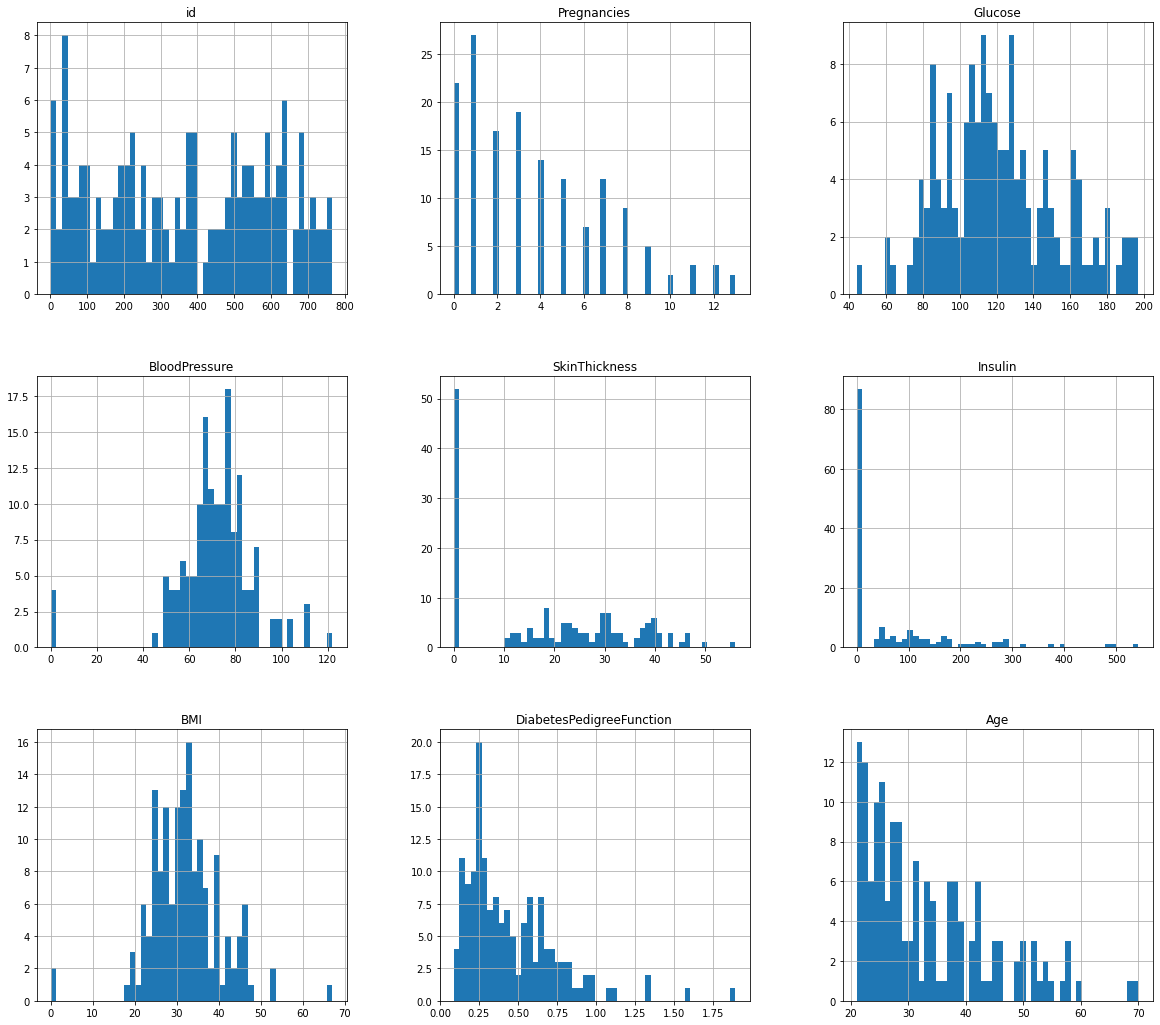

In [14]:
X_test.hist(bins=50, figsize=(20,18));
# BloodPressure, SkinThickness, Insulin, BMI의 값 중 0은 이상값

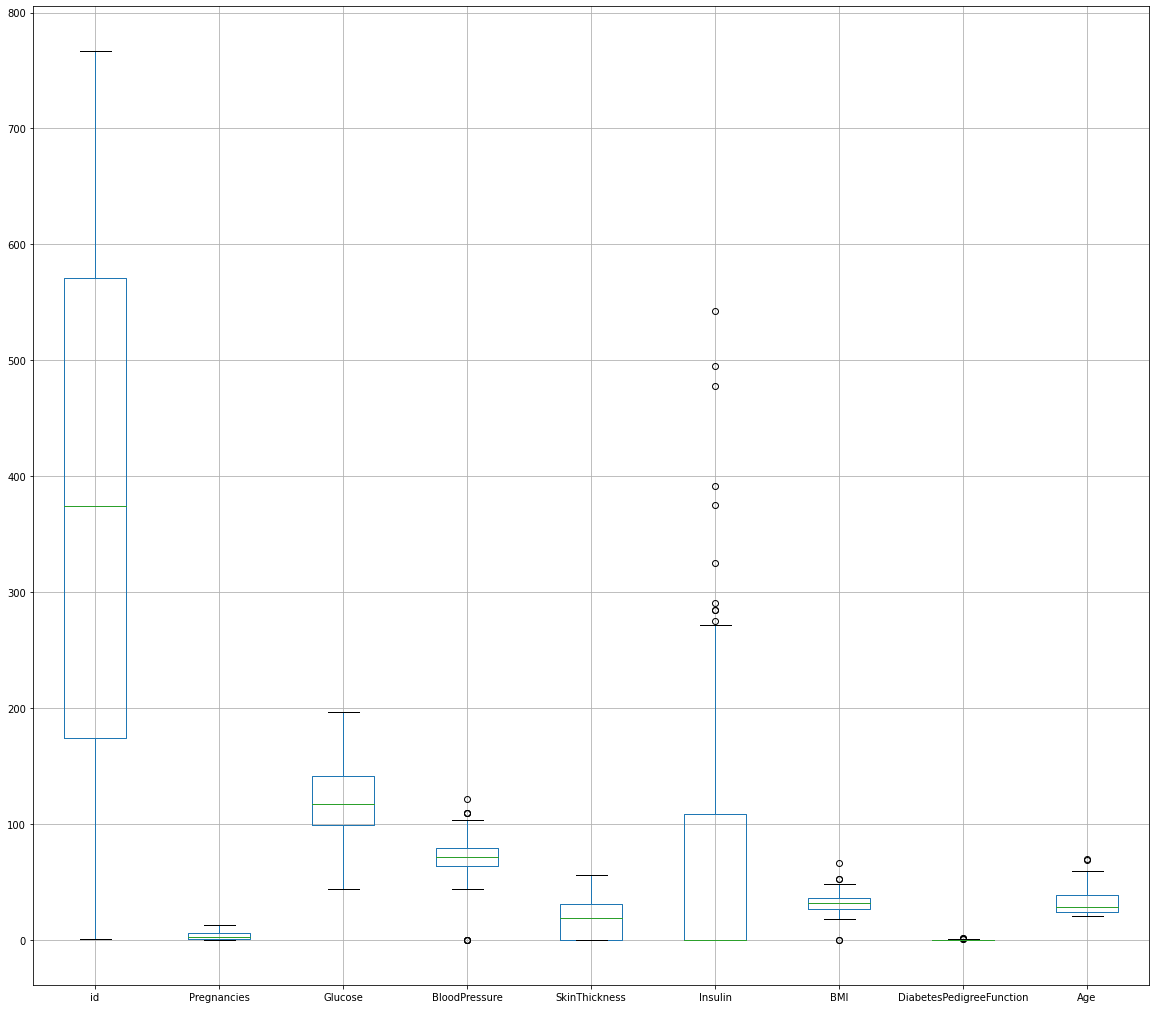

In [15]:
X_test.boxplot(figsize=(20,18));
# Insulin 이상값 확인 필요

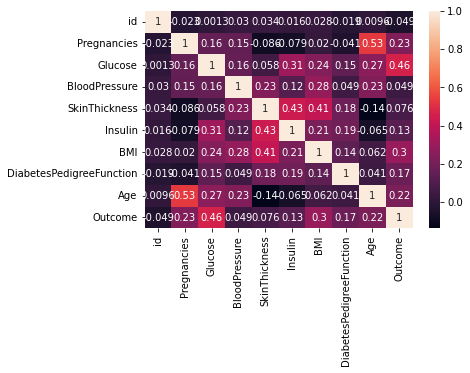

In [16]:
# 상관관계 확인
X_train['Outcome'] = y_train['Outcome']
sns.heatmap(X_train.corr(), annot=True);

## 데이터 전처리

In [17]:
X_train=X_train.drop(columns=['Outcome'])
y_train=y_train.drop(columns=['id'])
y_test=y_test.drop(columns=['id'])

In [18]:
# Train Data 이상값 확인
print(X_train[X_train['Glucose'] == 0]['Glucose'].value_counts())
print(X_train[X_train['BloodPressure'] == 0]['BloodPressure'].value_counts())
print(X_train[X_train['SkinThickness'] == 0]['SkinThickness'].value_counts())
print(X_train[X_train['Insulin'] == 0]['Insulin'].value_counts())
print(X_train[X_train['BMI'] == 0]['BMI'].value_counts())

print(X_train['Insulin'].sort_values(ascending=False).head(10))
print(X_train['SkinThickness'].sort_values(ascending=False).head(10))
# Insulin, SkinThickness의 최댓값 포함

0    5
Name: Glucose, dtype: int64
0    31
Name: BloodPressure, dtype: int64
0    175
Name: SkinThickness, dtype: int64
0    287
Name: Insulin, dtype: int64
0.0    9
Name: BMI, dtype: int64
13     846
228    744
247    680
584    600
409    579
286    545
655    540
753    510
111    495
153    485
Name: Insulin, dtype: int64
579    99
445    63
57     60
211    54
86     54
275    52
532    52
99     51
273    50
150    50
Name: SkinThickness, dtype: int64


In [19]:
# Test Data 이상값 확인
print(X_test[X_test['Glucose'] == 0]['Glucose'].value_counts())
print(X_test[X_test['BloodPressure'] == 0]['BloodPressure'].value_counts())
print(X_test[X_test['SkinThickness'] == 0]['SkinThickness'].value_counts())
print(X_test[X_test['Insulin'] == 0]['Insulin'].value_counts())
print(X_test[X_test['BMI'] == 0]['BMI'].value_counts())

print(X_test['Insulin'].sort_values(ascending=False).head(10))
# Insulin 최댓값 포함

Series([], Name: Glucose, dtype: int64)
0    4
Name: BloodPressure, dtype: int64
0    52
Name: SkinThickness, dtype: int64
0    87
Name: Insulin, dtype: int64
0.0    2
Name: BMI, dtype: int64
8      543
186    495
220    478
715    392
258    375
375    325
713    291
388    285
162    285
395    275
Name: Insulin, dtype: int64


In [20]:
# Train Data Glucose와 BMI 이상값 삭제
del_idx = X_train[(X_train['Glucose'] == 0) | (X_train['BMI'] == 0)].index
print(del_idx, len(del_idx))

# 이상값 처리 전/후 Shape 비교
print(X_train.shape, y_train.shape)
X_train=X_train.drop(index=del_idx,axis='index')
y_train=y_train.drop(index=del_idx,axis='index')
print(X_train.shape, y_train.shape)

Int64Index([60, 49, 182, 494, 522, 145, 75, 426, 371, 342, 81, 706, 502, 349], dtype='int64') 14
(614, 9) (614, 1)
(600, 9) (600, 1)


In [21]:
# Test Data BMI 이상값 삭제
del_idx_t = X_test[(X_test['BMI'] == 0)].index
print(del_idx_t, len(del_idx_t))

# 이상값 처리 전/후 Shape 비교
print(X_test.shape, y_test.shape)
X_test=X_test.drop(index=del_idx_t,axis='index')
y_test=y_test.drop(index=del_idx_t,axis='index')
print(X_test.shape, y_test.shape)

Int64Index([9, 684], dtype='int64') 2
(154, 9) (154, 1)
(152, 9) (152, 1)


In [22]:
# 나머지 이상값 대체 (평균)
cols = ['BloodPressure','SkinThickness','Insulin']
cols_mean = X_train[cols].mean()
X_train=X_train.replace(0, cols_mean)
X_test=X_test.replace(0, cols_mean)
X_train.head(20)

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64.0,35.000000,119.000000,30.5,1.400,34
344,344,8,95,72.0,21.148333,83.961667,36.8,0.485,57
390,390,1,100,66.0,29.000000,196.000000,32.0,0.444,42
150,150,1,136,74.0,50.000000,204.000000,37.4,0.399,24
132,132,3,170,64.0,37.000000,225.000000,34.5,0.356,30
124,124,0,113,76.0,21.148333,83.961667,33.3,0.278,23
605,605,1,124,60.0,32.000000,83.961667,35.8,0.514,21
443,443,8,108,70.0,21.148333,83.961667,30.5,0.955,33
327,327,10,179,70.0,21.148333,83.961667,35.1,0.200,37
235,235,4,171,72.0,21.148333,83.961667,43.6,0.479,26


In [23]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
mm_X_train=scaler.transform(X_train)
mm_X_test=scaler.transform(X_test)

## 모델 적용

In [24]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(mm_X_train, y_train)
pred_train=rf.predict(mm_X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_train)

0.7631578947368421

In [26]:
# Cat Boost
from catboost import CatBoostClassifier
cb=CatBoostClassifier()
cb.fit(mm_X_train, y_train)
pred_train=cb.predict(mm_X_test)

Learning rate set to 0.008283
0:	learn: 0.6884160	total: 60.9ms	remaining: 1m
1:	learn: 0.6851578	total: 62.9ms	remaining: 31.4s
2:	learn: 0.6808942	total: 64.6ms	remaining: 21.5s
3:	learn: 0.6767360	total: 65.9ms	remaining: 16.4s
4:	learn: 0.6733723	total: 67ms	remaining: 13.3s
5:	learn: 0.6699374	total: 69.4ms	remaining: 11.5s
6:	learn: 0.6662742	total: 72.6ms	remaining: 10.3s
7:	learn: 0.6625664	total: 75.3ms	remaining: 9.34s
8:	learn: 0.6591243	total: 77ms	remaining: 8.48s
9:	learn: 0.6551871	total: 78.7ms	remaining: 7.79s
10:	learn: 0.6529489	total: 81ms	remaining: 7.28s
11:	learn: 0.6494724	total: 82.9ms	remaining: 6.83s
12:	learn: 0.6459006	total: 84.4ms	remaining: 6.41s
13:	learn: 0.6420419	total: 86ms	remaining: 6.05s
14:	learn: 0.6391783	total: 87.7ms	remaining: 5.76s
15:	learn: 0.6356838	total: 89.2ms	remaining: 5.48s
16:	learn: 0.6323083	total: 90.8ms	remaining: 5.25s
17:	learn: 0.6292740	total: 92.5ms	remaining: 5.05s
18:	learn: 0.6260832	total: 94.2ms	remaining: 4.86s
19:

In [27]:
accuracy_score(y_test, pred_train)

0.7763157894736842

## 튜닝

In [28]:
# Random Forest 튜닝
def objective(trial,data=mm_X_train,target=y_train):
    
    param = {
        'max_depth':trial.suggest_int('max_depth', 3,30), 
        'min_samples_split':trial.suggest_int('min_samples_split',2, 30), 
        'min_samples_leaf':trial.suggest_int('min_samples_leaf',1, 20),
        'max_samples':trial.suggest_int('max_samples',1,20),
        'n_estimators':trial.suggest_categorical('n_estimators', [100,200,300,400,500,600,700,800,900,1000]),
        'max_features':trial.suggest_categorical('max_features',['auto','log2']),
        'random_state':2022
    }
    model = RandomForestClassifier(**param)
    
    model.fit(mm_X_train,y_train)
    preds = model.predict(mm_X_test)
    score = accuracy_score(y_test, preds)
    
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=250)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

rf = RandomForestClassifier(**study.best_params)

[I 2022-07-18 03:42:06,194] A new study created in memory with name: no-name-327ba4e5-e5fc-42d2-9dfe-3a81c1404810
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
[I 2022-07-18 03:42:06,393] Trial 0 finished with value: 0.631578947368421 and parameters: {'max_depth': 4, 'min_samples_split': 12, 'min_samples_leaf': 18, 'max_samples': 14, 'n_estimators': 100, 'max_features': 'log2'}. Best is trial 0 with value: 0.631578947368421.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
[I 2022-07-18 03:42:06,959] Trial 1 finished with value: 0.631578947368421 and parameters: {'ma

Number of finished trials: 250
Best trial: {'max_depth': 12, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_samples': 19, 'n_estimators': 400, 'max_features': 'auto'}


In [29]:
# Cat Boost 튜닝
def objective(trial):
    param = {
                #'iterations' : 10000, replaced by early stopping
                'eval_metric': 'Accuracy', 
                'use_best_model': True,
                'random_seed' : 1,
                'learning_rate' :trial.suggest_loguniform('learning_rate', 0.01, 0.3),
                "depth": trial.suggest_int("depth", 1, 15),
                'l2_leaf_reg' :trial.suggest_loguniform('l2_leaf_reg', 1e-8, 20),
                'random_strength' : trial.suggest_loguniform('random_strength', 1, 50),
                'grow_policy':trial.suggest_categorical ('grow_policy', ['Lossguide','SymmetricTree']),
                'max_bin': trial.suggest_int("max_bin", 20, 500),
                'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 1, 100),
                "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli"])
            }
    
    if param['grow_policy'] == 'Lossguide':
        param['max_leaves']:trial.suggest_int('max_leaves', 1, 100)
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    model = CatBoostClassifier(**param)
    model.fit(mm_X_train, y_train, eval_set=[(mm_X_test, y_test)], verbose=0, early_stopping_rounds=100)
    
    preds = model.predict(X_test)
    score = accuracy_score(y_test, preds)
    
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

cb = CatBoostClassifier(**study.best_params)

[I 2022-07-18 03:45:58,875] A new study created in memory with name: no-name-b0f30bc6-a03d-4c5a-adc8-9d08f33ff06f
[I 2022-07-18 03:45:59,382] Trial 0 finished with value: 0.3684210526315789 and parameters: {'learning_rate': 0.015794962353708038, 'depth': 12, 'l2_leaf_reg': 9.322930581380992e-08, 'random_strength': 2.123686242994784, 'grow_policy': 'Lossguide', 'max_bin': 355, 'min_data_in_leaf': 61, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 5.711664801749896}. Best is trial 0 with value: 0.3684210526315789.
[I 2022-07-18 03:45:59,536] Trial 1 finished with value: 0.3684210526315789 and parameters: {'learning_rate': 0.07573025409113342, 'depth': 1, 'l2_leaf_reg': 0.0005587297479723696, 'random_strength': 47.33152886923742, 'grow_policy': 'Lossguide', 'max_bin': 194, 'min_data_in_leaf': 63, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.22595503634384007}. Best is trial 0 with value: 0.3684210526315789.
[I 2022-07-18 03:45:59,956] Trial 2 finished with value: 0.3684210

Number of finished trials: 100
Best trial: {'learning_rate': 0.039488355353687415, 'depth': 5, 'l2_leaf_reg': 5.042264115552689e-06, 'random_strength': 48.55732695412005, 'grow_policy': 'Lossguide', 'max_bin': 337, 'min_data_in_leaf': 85, 'bootstrap_type': 'Bernoulli', 'subsample': 0.12427918222947129}


## 최종 모델 적용

In [30]:
rf=RandomForestClassifier(max_depth=17,min_samples_split=5, min_samples_leaf=1,max_samples=18,
                          n_estimators=1000,max_features='log2', random_state=2022)
rf.fit(mm_X_train, y_train)
pred_rf=rf.predict(mm_X_test)
accuracy_score(y_test, pred_rf)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7763157894736842

In [31]:
cb=CatBoostClassifier()
cb.fit(mm_X_train, y_train)
pred_cb=cb.predict(mm_X_test)
print(accuracy_score(y_test, pred_cb)) # 0.776

tuned_cb=CatBoostClassifier(learning_rate=0.01402511395610688, depth=10, l2_leaf_reg=4.6434771309467723e-07, random_strength=3.372125267651585,
                            grow_policy='SymmetricTree',max_bin=118, min_data_in_leaf=25, bootstrap_type='Bernoulli', subsample=0.8552049477553544)
tuned_cb.fit(mm_X_train, y_train)
pred_tuned_cb=tuned_cb.predict(mm_X_test)
print(accuracy_score(y_test, pred_tuned_cb)) # 0.763

Learning rate set to 0.008283
0:	learn: 0.6884160	total: 2.1ms	remaining: 2.1s
1:	learn: 0.6851578	total: 3.54ms	remaining: 1.77s
2:	learn: 0.6808942	total: 4.92ms	remaining: 1.64s
3:	learn: 0.6767360	total: 6.25ms	remaining: 1.55s
4:	learn: 0.6733723	total: 7.79ms	remaining: 1.55s
5:	learn: 0.6699374	total: 9.38ms	remaining: 1.55s
6:	learn: 0.6662742	total: 10.7ms	remaining: 1.52s
7:	learn: 0.6625664	total: 12.2ms	remaining: 1.51s
8:	learn: 0.6591243	total: 13.5ms	remaining: 1.49s
9:	learn: 0.6551871	total: 15ms	remaining: 1.49s
10:	learn: 0.6529489	total: 16.5ms	remaining: 1.48s
11:	learn: 0.6494724	total: 18ms	remaining: 1.48s
12:	learn: 0.6459006	total: 19.6ms	remaining: 1.49s
13:	learn: 0.6420419	total: 21ms	remaining: 1.48s
14:	learn: 0.6391783	total: 22.6ms	remaining: 1.48s
15:	learn: 0.6356838	total: 23.9ms	remaining: 1.47s
16:	learn: 0.6323083	total: 25.4ms	remaining: 1.47s
17:	learn: 0.6292740	total: 27ms	remaining: 1.47s
18:	learn: 0.6260832	total: 28.4ms	remaining: 1.46s
19

In [32]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('CatBoost',cb), ('RandomForest',rf), ('CatBoost_Tuned',tuned_cb)], voting='soft')
voting.fit(mm_X_train, y_train)
pred=voting.predict(mm_X_test)
accuracy_score(y_test, pred)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Learning rate set to 0.008283
0:	learn: 0.6884160	total: 1.49ms	remaining: 1.49s
1:	learn: 0.6851578	total: 3.05ms	remaining: 1.52s
2:	learn: 0.6808942	total: 4.59ms	remaining: 1.53s
3:	learn: 0.6767360	total: 6.12ms	remaining: 1.52s
4:	learn: 0.6733723	total: 7.62ms	remaining: 1.51s
5:	learn: 0.6699374	total: 9.23ms	remaining: 1.53s
6:	learn: 0.6662742	total: 10.7ms	remaining: 1.52s
7:	learn: 0.6625664	total: 12.1ms	remaining: 1.5s
8:	learn: 0.6591243	total: 13.6ms	remaining: 1.5s
9:	learn: 0.6551871	total: 15.2ms	remaining: 1.5s
10:	learn: 0.6529489	total: 16.6ms	remaining: 1.49s
11:	learn: 0.6494724	total: 18.1ms	remaining: 1.49s
12:	learn: 0.6459006	total: 19.5ms	remaining: 1.48s
13:	learn: 0.6420419	total: 20.8ms	remaining: 1.46s
14:	learn: 0.6391783	total: 22.3ms	remaining: 1.46s
15:	learn: 0.6356838	total: 23.6ms	remaining: 1.45s
16:	learn: 0.6323083	total: 25.1ms	remaining: 1.45s
17:	learn: 0.6292740	total: 26.5ms	remaining: 1.45s
18:	learn: 0.6260832	total: 27.9ms	remaining: 1

0.7697368421052632

## 예측값 출력

In [33]:
output=pd.DataFrame({'id':X_test.index, 'Outcome':pred})
output.head()

,id,Outcome
0,258,1
1,220,1
2,438,0
3,130,1
4,730,0


In [34]:
output.to_csv('Diabetes_Output.csv', index=False)